<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Probabilidade" data-toc-modified-id="Probabilidade-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Probabilidade</a></span><ul class="toc-item"><li><span><a href="#Espaço-Amostral" data-toc-modified-id="Espaço-Amostral-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Espaço Amostral</a></span></li><li><span><a href="#Amostragem" data-toc-modified-id="Amostragem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Amostragem</a></span></li><li><span><a href="#Amostra" data-toc-modified-id="Amostra-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Amostra</a></span></li><li><span><a href="#Distribuições-de-Probabilidade" data-toc-modified-id="Distribuições-de-Probabilidade-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Distribuições de Probabilidade</a></span><ul class="toc-item"><li><span><a href="#Distribuição-de-Bernoulli" data-toc-modified-id="Distribuição-de-Bernoulli-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Distribuição de Bernoulli</a></span></li><li><span><a href="#Distribuição-Binomial" data-toc-modified-id="Distribuição-Binomial-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Distribuição Binomial</a></span></li><li><span><a href="#Distribuição-Geométrica" data-toc-modified-id="Distribuição-Geométrica-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Distribuição Geométrica</a></span></li><li><span><a href="#Distribuição-de-Poisson" data-toc-modified-id="Distribuição-de-Poisson-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Distribuição de Poisson</a></span></li><li><span><a href="#Distribuição-Exponencial" data-toc-modified-id="Distribuição-Exponencial-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Distribuição Exponencial</a></span></li><li><span><a href="#Teorema-do-Limite-Central" data-toc-modified-id="Teorema-do-Limite-Central-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>Teorema do Limite Central</a></span></li></ul></li></ul></li><li><span><a href="#Intervalo-de-Confiaça-e-RMSE" data-toc-modified-id="Intervalo-de-Confiaça-e-RMSE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intervalo de Confiaça e RMSE</a></span><ul class="toc-item"><li><span><a href="#RMSE-e-Complexidade" data-toc-modified-id="RMSE-e-Complexidade-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>RMSE e Complexidade</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Probabilidade

Como vimos na aula de estatíticas descritivas, probabilidade é o estudo de fenômenos aleatórios a partir da construção de modelos probabilísticos (no sentido contrário da estatística, que estima modelos probabílisticos a partir de observações/dados).

Mas o que são **modelos probabilísticos**? Para entender este conceito, vamos olhar primeiro para alguns conceitos fundamentais em probabilidade: **variáveis aleatórias**, **espaço amostral** e **função de probabilidade**.

## V.A. e Espaço Amostral

*Uma variável aleatória é uma variável quantitativa, cujo resultado (valor) depende de fatores aleatórios*. Por exemplo, o **resultado** do lance de uma moeda é uma variável aleatória. O espaço amostral é o conjunto de valores que nossa variável aleatória pode assumir: no exemplo da moeda, o espaço amostral é o conjunto `{cara, coroa}`.

Vamos representar o espaço amostral acima através de uma lista:

In [2]:
moeda = ['cara', 'coroa']

## Função de Probabilidade

A segunda parte de um modelo probabilístico é a **função de probabilidade**: esta função **atribui** à cada elemento do nosso **espaço amostral** uma probabilidade tal que a somatória da probabilidade de todos os eventos de nosso espaço amostra é sempre 1.

No nosso exemplo da moeda, caso esta seja justa, a função de probabilidade atribuirá 0,5 ao elemento `cara` e 0,5 ao elemento `coroa`. Vamos utilizar a função `choice()` do submódulo `random` da biblioteca `numpy` para representar nossa função de probabilidade. Esta função nos permite mapear um vetor de probabilidades, através do argumento `p = [...]`, à um espaço amostral:

In [3]:
np.random.choice(moeda, p = [0.5, 0.5])

'coroa'

## Amostragem

Toda vez que executamos a função acima estamos **amostrando** nossa variável aleatória, ou seja, estamos *criando* uma observação a partir do nosso modelo probabilístico. Vamos definir duas funções de probabilidade (dois modelos distintos descrevendo duas variáveis aleatórias diferentes): uma para uma moeda justa e outra para uma moeda injusta:

In [4]:
def jogar_moeda_justa():
    return np.random.choice(moeda)

In [5]:
jogar_moeda_justa()

'coroa'

In [6]:
def jogar_moeda_injusta():
    return np.random.choice(moeda, p = [0.1, 0.9])

In [7]:
jogar_moeda_injusta()

'coroa'

## Amostra

Uma **amostra** é um conjunto de observações da nossa variável aleatória. Por exemplo, se lançarmos 100 moedas justas, teremos uma amostra de tamanho 100 da nossa variável. Vamos utilizar um `list comprehesion` para simular este processo:

In [8]:
amostra_100 = [jogar_moeda_injusta() for i in range(100)]

In [9]:
amostra_100[0:5]

['coroa', 'coroa', 'coroa', 'coroa', 'cara']

In [10]:
from collections import Counter

In [11]:
Counter(amostra_100)

Counter({'coroa': 90, 'cara': 10})

## Extendendo Variáveis Aleatórias

O exemplo acima trata um tipo de fenômeno aleatório extremamente simples: um lance de moeda. No entanto, podemos construir variáveis aleatórias mais complexas a partir da realização do processo de amostragem. Por exemplo, podemos definir uma variável aleatória para mensurar a probabilidade de ter **N caras** em **M lances de uma moeda justa**.

Esta nova função tem um espaço amostral composto por vetores de cara e coroa com **comprimento M** e nos permite medir a probabilidade de observarmos **2 caras em 3 lances de uma moeda justa**. O espaço amostral dessa variável aleatória:

```
['cara', 'cara', 'cara']

['cara', 'cara', 'coroa']
['cara', 'coroa', 'cara']
['coroa', 'cara', 'cara']

['cara', 'coroa', 'coroa']
['coroa', 'cara', 'coroa']
['coroa', 'coroa', 'cara']

['coroa', 'coroa', 'coroa']
```

Ou seja, nosso espaço amostral contém todos os resultados possíveis de 3 lances de uma moeda justa - e a probabilidade de observar 2 caras em 3 lances de uma moeda justa é 3/8. No exemplo acima fica claro que a construção manual do espaço amostral, mesmo quando ele é simples, é inviável! Temos duas formas de contornar este problema:

1. Diversos problemas, como o descrito acima, tem equações que nos permitem calcular, a partir da formulação do problema, a probabilidade de um certo tipo de evento;
1. Utilizando amostragem e a **lei dos grandes números**!


A **lei dos grandes números** é um teorema fundamental da probabilidade que garante que conforme aumentamos o tamanho de uma amostra a **% de eventos observada converge para a probabilidade daquele evento**!

Vamos alavancar o poder computacional e utilizar a função `jogar_moeda_justa()` para ver a **lei dos grandes números** em operação. Primeiro, vamos definir uma nova função de amostragem para nosso novo espaço amostral:

In [16]:
def jogar_3_moedas():
    evento = [jogar_moeda_justa() for i in range(3)]
    return evento

In [17]:
jogar_3_moedas()

['cara', 'coroa', 'cara']

Agora, vamos criar uma função para construir amostras de tamanho fixo:

In [18]:
def amostrar_3_moedas(n_amostras):
    amostra = [jogar_3_moedas() for i in range(n_amostras)]
    return amostra

In [19]:
amostrar_3_moedas(10)

[['coroa', 'coroa', 'coroa'],
 ['cara', 'cara', 'cara'],
 ['cara', 'coroa', 'coroa'],
 ['cara', 'cara', 'cara'],
 ['coroa', 'coroa', 'coroa'],
 ['cara', 'cara', 'coroa'],
 ['coroa', 'cara', 'cara'],
 ['cara', 'coroa', 'cara'],
 ['coroa', 'coroa', 'cara'],
 ['cara', 'cara', 'coroa']]

Agora vamos construir uma função para calcular a **% de observações com duas caras** para uma dada amostra:

In [22]:
def per_2_caras(amostra):
    contagem_caras = [evento.count('coroa') for evento in amostra]
    return contagem_caras.count(2)/len(amostra)

In [26]:
per_2_caras(amostrar_3_moedas(10))

0.5

Agora vamos criar um loop para calcular **% de observações com duas caras** para amostras de tamanho de 1 à 1000:

In [31]:
per_observada = []
for i in range(1, 2001):
    per_observada.append(per_2_caras(amostrar_3_moedas(i)))

Agora vamos comparar a **% de observações com 2 caras** com a **probabilidade que calculamos** a partir do espaço amostral:

Text(0, 0.5, '% de Observações com duas Cara')

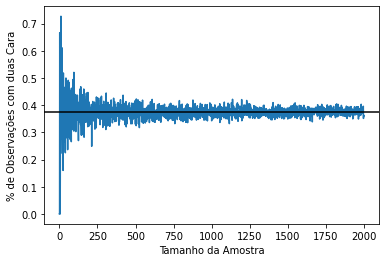

In [34]:
fig, ax = plt.subplots()
ax.plot(per_observada)
ax.axhline(3/8, color = 'black')
ax.set_xlabel('Tamanho da Amostra')
ax.set_ylabel('% de Observações com duas Cara')

## Distribuições de Probabilidade

### Distribuição de Bernoulli

Espaço amostral: Booleano

<img src="bernoulli.jpg" alt="Drawing" style="width: 200px;"/>

In [66]:
amostra_justa = [jogar_moeda_justa() for i in range(10000)]
amostra_injusta = [jogar_moeda_injusta() for i in range(100)]

In [67]:
Counter(amostra_justa)

Counter({'coroa': 4958, 'cara': 5042})

In [68]:
pd.DataFrame([Counter(amostra_justa)])/10000

,coroa,cara
0,0.4958,0.5042


<AxesSubplot:>

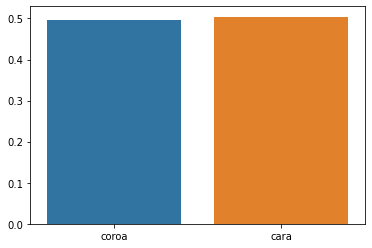

In [70]:
sns.barplot(data = pd.DataFrame([Counter(amostra_justa)])/10000)

In [71]:
Counter(amostra_injusta)

Counter({'coroa': 94, 'cara': 6})

<AxesSubplot:>

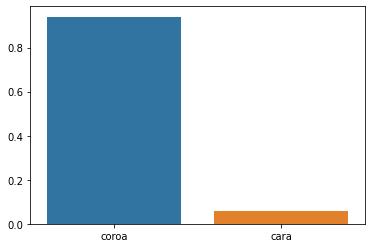

In [72]:
sns.barplot(data = pd.DataFrame([Counter(amostra_injusta)])/100)

### Distribuição Binomial

Espaço amostral: Inteiros >= 0

In [73]:
def numero_coroa_justa(amostras):
    amostra = [jogar_moeda_justa() for i in range(amostras)]
    return Counter(amostra)['coroa']

In [80]:
numero_coroa_justa(10)

4

In [98]:
amostra_binomial = [numero_coroa_justa(10) for i in range(10000)]

In [99]:
amostra_binomial[0:6]

[8, 5, 5, 6, 4, 5]

In [100]:
contagem_amostra = Counter(amostra_binomial)
contagem_amostra

Counter({8: 429,
         5: 2412,
         6: 2131,
         4: 2048,
         3: 1148,
         7: 1179,
         2: 435,
         1: 107,
         9: 91,
         10: 11,
         0: 9})

In [101]:
contagem_amostra = Counter(amostra_binomial)
tb_binom = pd.DataFrame({
    'num_coroas': contagem_amostra.keys(),
    'num_eventos': contagem_amostra.values()
})
tb_binom['prob_medida'] = tb_binom['num_eventos']/sum(tb_binom['num_eventos'])
tb_binom = tb_binom.sort_values('num_coroas')

In [102]:
tb_binom

,num_coroas,num_eventos,prob_medida
10,0,9,0.0009
7,1,107,0.0107
6,2,435,0.0435
4,3,1148,0.1148
3,4,2048,0.2048
1,5,2412,0.2412
2,6,2131,0.2131
5,7,1179,0.1179
0,8,429,0.0429
8,9,91,0.0091


<AxesSubplot:xlabel='num_coroas', ylabel='prob_medida'>

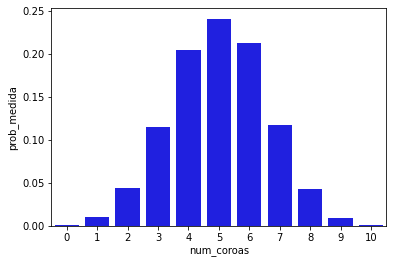

In [103]:
sns.barplot(data = tb_binom, x = 'num_coroas', y = 'prob_medida', color='blue')

In [104]:
dist_binomial = sp.stats.binom(10, 0.5)

<AxesSubplot:>

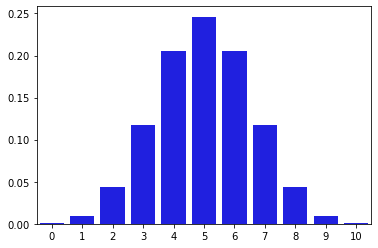

In [105]:
x = np.arange(0,11)
y = dist_binomial.pmf(x)
sns.barplot(x= x, y=y, color='blue')

Podemos usar a pmf (probability mass function, ou função massa de probabilidade) para calcular a probabilidade de uma dada contagem de eventos positivos:

In [106]:
dist_binomial.pmf(5)

0.24609375000000025

In [107]:
sum([dist_binomial.pmf(i) for i in [0, 1, 2]])

0.0546875

e podemos usar a função distribuição acumulada, ou C.D.F. (cumulative distribution function) para calcular a probabilidade de até N eventos:

In [108]:
dist_binomial.cdf(2)

0.054687500000000014

<AxesSubplot:>

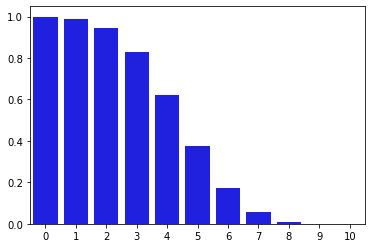

In [109]:
x = np.arange(0,11)
y = 1-dist_binomial.cdf(x)
sns.barplot(x= x, y=y, color='blue')

In [110]:
tb_binom.head()

,num_coroas,num_eventos,prob_medida
10,0,9,0.0009
7,1,107,0.0107
6,2,435,0.0435
4,3,1148,0.1148
3,4,2048,0.2048


In [111]:
tb_binom['prob_real'] = tb_binom['num_coroas'].apply(dist_binomial.pmf)

In [112]:
tb_binom

,num_coroas,num_eventos,prob_medida,prob_real
10,0,9,0.0009,0.000977
7,1,107,0.0107,0.009766
6,2,435,0.0435,0.043945
4,3,1148,0.1148,0.117188
3,4,2048,0.2048,0.205078
1,5,2412,0.2412,0.246094
2,6,2131,0.2131,0.205078
5,7,1179,0.1179,0.117188
0,8,429,0.0429,0.043945
8,9,91,0.0091,0.009766


<AxesSubplot:xlabel='num_coroas', ylabel='prob_real'>

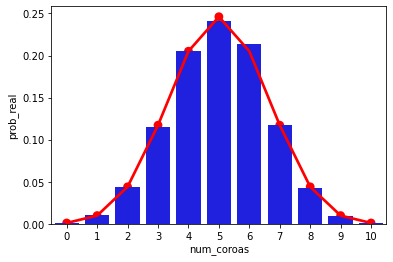

In [113]:
sns.barplot(data = tb_binom, x = 'num_coroas', y = 'prob_medida', color='blue')
sns.pointplot(data = tb_binom, x = 'num_coroas', y = 'prob_real', color = 'red')

### Distribuição Geométrica

Espaço amostral: Inteiros positivos (> 0)

In [114]:
def primeira_coroa_justa():
    i = 0
    while True:
        if jogar_moeda_justa() == 'coroa':
            i += 1
            return i
        else:
            i += 1

In [121]:
primeira_coroa_justa()

1

In [139]:
amostra_geo = [primeira_coroa_justa() for i in range(100)]

In [140]:
amostra_geo[1:10]

[1, 2, 2, 1, 2, 2, 1, 1, 2]

In [141]:
contagem_amostra = Counter(amostra_geo)
tb_geo = pd.DataFrame({
    'num_primeira_coroa': contagem_amostra.keys(),
    'num_eventos': contagem_amostra.values()
})
tb_geo = tb_geo.sort_values('num_primeira_coroa')

In [142]:
tb_geo

,num_primeira_coroa,num_eventos
0,1,48
1,2,27
2,3,17
3,4,3
5,5,2
4,6,3


<AxesSubplot:xlabel='num_primeira_coroa', ylabel='num_eventos'>

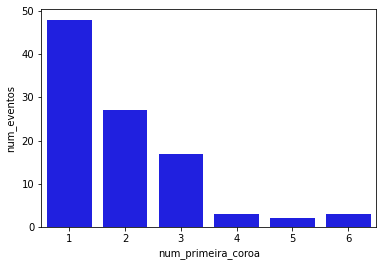

In [143]:
sns.barplot(data = tb_geo, x = 'num_primeira_coroa', y = 'num_eventos', color = 'blue')

In [144]:
dist_geom = sp.stats.geom(0.5)

In [145]:
tb_geo['prob_medida'] = tb_geo['num_eventos']/sum(tb_geo['num_eventos'])
tb_geo['prob_real'] = tb_geo['num_primeira_coroa'].apply(dist_geom.pmf)

<AxesSubplot:xlabel='num_primeira_coroa', ylabel='prob_real'>

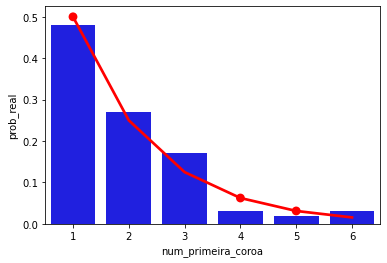

In [146]:
sns.barplot(data = tb_geo, x = 'num_primeira_coroa', y = 'prob_medida', color = 'blue')
sns.pointplot(data = tb_geo, x = 'num_primeira_coroa', y = 'prob_real', color = 'red')

### Distribuição de Poisson

<img src="poisson.jpg" alt="Drawing" style="width: 200px;"/>

In [147]:
evento_raro = ['raro', 'comum']

In [148]:
def simular_er():
    p = 1/1e05
    return np.random.choice(evento_raro, p = [p, 1-p])

In [149]:
def numero_eventos_raros(amostras):
    amostra = [simular_er() for i in range(int(amostras))]
    return Counter(amostra)['raro']

In [150]:
numero_eventos_raros(2e05)

1

In [151]:
amostra_poi = [numero_eventos_raros(2e05) for i in range(100)]

In [153]:
amostra_poi[0:6]

[3, 2, 2, 5, 2, 1]

In [154]:
contagem_amostra = Counter(amostra_poi)
tb_poisson = pd.DataFrame({
    'num_raros': contagem_amostra.keys(),
    'num_eventos': contagem_amostra.values()
})
tb_poisson = tb_poisson.sort_values('num_raros')

<AxesSubplot:xlabel='num_raros', ylabel='num_eventos'>

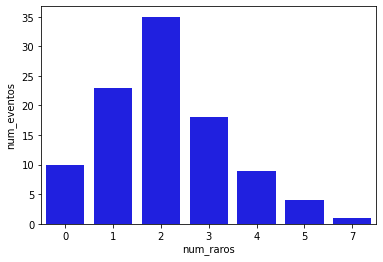

In [155]:
sns.barplot(data = tb_poisson, x = 'num_raros', y = 'num_eventos', color='blue')

In [157]:
p = 1/1e05
n = 2e05
lamb = p * n
dist_poisson = sp.stats.poisson(p*n)

In [158]:
tb_poisson['prob_medida'] = tb_poisson['num_eventos']/sum(tb_poisson['num_eventos'])
tb_poisson['prob_real'] = tb_poisson['num_raros'].apply(dist_poisson.pmf)

<AxesSubplot:xlabel='num_raros', ylabel='prob_real'>

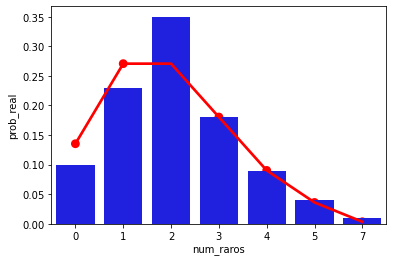

In [159]:
sns.barplot(data = tb_poisson, x = 'num_raros', y = 'prob_medida', color='blue')
sns.pointplot(data = tb_poisson, x = 'num_raros', y = 'prob_real', color='red')

### Distribuição Exponencial

In [160]:
dist_exp = sp.stats.expon(scale = 1/lamb)

<AxesSubplot:>

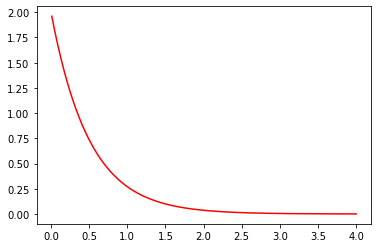

In [165]:
x = np.linspace(0.01, 4, 1000)
y = dist_exp.pdf(x)
sns.lineplot(x = x, y = y, color='red')

<AxesSubplot:>

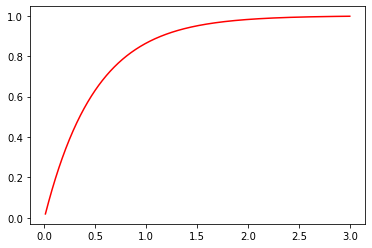

In [164]:
x = np.linspace(0.01, 3, 1000)
y = dist_exp.cdf(x)
sns.lineplot(x = x, y = y, color='red')

In [166]:
amostra_exp = dist_exp.rvs(size=100)
tb_expon = pd.DataFrame({'t' : amostra_exp})

In [167]:
tb_expon

,t
0,2.418527
1,2.082397
2,0.149240
3,1.786140
4,0.232033
...,...
95,0.013178
96,0.183268
97,0.184334
98,0.228733


In [168]:
tb_expon['t_acumulado'] = tb_expon['t'].cumsum()

In [169]:
tb_expon

,t,t_acumulado
0,2.418527,2.418527
1,2.082397,4.500924
2,0.149240,4.650164
3,1.786140,6.436304
4,0.232033,6.668337
...,...,...
95,0.013178,53.567233
96,0.183268,53.750500
97,0.184334,53.934835
98,0.228733,54.163568


In [170]:
tb_expon['minuto'] = np.floor(tb_expon['t_acumulado'])

In [171]:
tb_expon

,t,t_acumulado,minuto
0,2.418527,2.418527,2.0
1,2.082397,4.500924,4.0
2,0.149240,4.650164,4.0
3,1.786140,6.436304,6.0
4,0.232033,6.668337,6.0
...,...,...,...
95,0.013178,53.567233,53.0
96,0.183268,53.750500,53.0
97,0.184334,53.934835,53.0
98,0.228733,54.163568,54.0


In [172]:
tb_num_eventos = pd.DataFrame({'minuto' : range(0, int(max(tb_expon['minuto']) + 1))})

In [173]:
n_eventos_minuto = tb_expon.groupby('minuto')['t'].count().reset_index()  

In [174]:
n_eventos_minuto.head()

,minuto,t
0,2.0,1
1,4.0,2
2,6.0,3
3,7.0,1
4,8.0,2


In [175]:
tb_nev_min = pd.merge(tb_num_eventos, n_eventos_minuto, how = 'left', on = 'minuto')
tb_nev_min = tb_nev_min.fillna(0)
tb_nev_min = tb_nev_min.rename({'t' : 'num_chegadas'}, axis = 1)

In [177]:
tb_nev_min

,minuto,num_chegadas
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,2.0
5,5,0.0
6,6,3.0
7,7,1.0
8,8,2.0
9,9,3.0


In [178]:
tb_poiss_pro = tb_nev_min.groupby('num_chegadas').sum().reset_index()
tb_poiss_pro = tb_poiss_pro.rename({'minuto' : 'num_eventos'}, axis = 1)
tb_poiss_pro['prob_real'] = tb_poiss_pro['num_chegadas'].apply(dist_poisson.pmf)
tb_poiss_pro['prob_medida'] = tb_poiss_pro['num_eventos']/sum(tb_poiss_pro['num_eventos'])
tb_poiss_pro

,num_chegadas,num_eventos,prob_real,prob_medida
0,0.0,151,0.135335,0.101684
1,1.0,276,0.270671,0.185859
2,2.0,572,0.270671,0.385185
3,3.0,250,0.180447,0.168350
4,4.0,183,0.090224,0.123232
5,5.0,53,0.036089,0.035690


<AxesSubplot:xlabel='num_chegadas', ylabel='prob_real'>

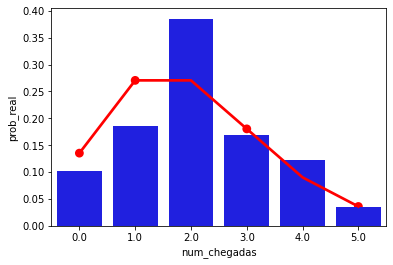

In [179]:
sns.barplot(data = tb_poiss_pro, x = 'num_chegadas', y = 'prob_medida', color = 'blue')
sns.pointplot(data = tb_poiss_pro, x = 'num_chegadas', y = 'prob_real', color='red')

### Teorema do Limite Central

In [180]:
amostra_binomial_array = np.array(amostra_binomial[0:99])
amostra_binomial[0:5]

[8, 5, 5, 6, 4]

In [181]:
amostra_geo_array = np.array(amostra_geo[0:99])
amostra_geo[0:5]

[1, 1, 2, 2, 1]

In [182]:
amostra_poi_array = np.array(amostra_poi[0:99])
amostra_poi[0:5]

[3, 2, 2, 5, 2]

In [183]:
amostra_exp_array = np.array(amostra_exp[0:99])
amostra_exp[0:5]

array([2.41852665, 2.08239741, 0.1492403 , 1.78613964, 0.23203325])

In [184]:
def norm_array(arr):
    mu_arr = np.mean(arr)
    sd_arr = np.std(arr)
    
    return (arr - mu_arr)/sd_arr

In [185]:
amostra_binomial_norm = norm_array(amostra_binomial_array)
amostra_geo_array = norm_array(amostra_geo_array)
amostra_poi_array = norm_array(amostra_poi_array)
amostra_exp_array = norm_array(amostra_exp_array)

In [186]:
amostra_norm = amostra_binomial_norm + amostra_geo_array + amostra_poi_array + amostra_exp_array

In [187]:
amostra_norm

array([ 5.19502231e+00,  1.87721248e+00, -6.41813488e-01,  5.10497178e+00,
       -1.99635050e+00, -1.52526646e+00,  1.36428689e+00, -2.59117300e+00,
       -2.54680163e+00,  4.19138528e+00,  4.48305821e-01,  9.04849876e-01,
        1.42863476e+00, -1.71769966e-01,  3.91066626e+00, -1.49879183e+00,
       -6.50153065e-01,  4.05360971e-01, -1.11454432e+00, -1.02296684e+00,
        5.27731544e-01, -8.60276708e-01, -2.01338455e+00, -4.94447904e-01,
       -1.09075530e+00,  1.63583855e+00,  5.92133305e-01, -2.63131804e+00,
        5.65639838e-01, -1.25219212e+00, -1.08838363e+00,  1.18662267e+00,
       -2.40963284e+00,  4.91051152e+00, -1.39651838e+00,  1.95534596e+00,
        8.05750005e-01,  5.32820969e-01, -2.92107650e+00, -1.59161862e+00,
        1.62898635e+00,  3.73622019e-01, -5.88989241e-01,  6.14491039e-01,
        1.79402433e+00,  6.07558706e-02, -3.17683022e-01, -1.90110266e-01,
       -6.88118910e-01, -2.11170926e+00,  3.57700876e-02, -1.48361054e+00,
       -5.96286332e-01,  

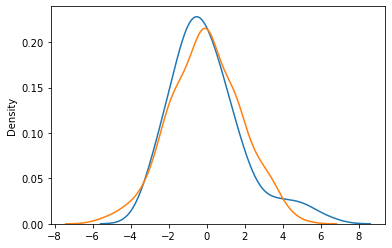

In [188]:
dist_norm = sp.stats.norm(loc = np.mean(amostra_norm), scale = np.std(amostra_norm))
random_sample = dist_norm.rvs(1000)
sns.kdeplot(amostra_norm);
sns.kdeplot(random_sample);

# Intervalo de Confiaça e RMSE

In [20]:
candidatos = ['A', 'B']
def intencao_voto():
    return np.random.choice(candidatos, p = [0.01, 0.99])

In [21]:
intencao_voto()

'B'

In [22]:
def pesquisa_opiniao(tamanho_amostra):
    pesquisa = [intencao_voto() for i in range(tamanho_amostra)]
    c_pesq = Counter(pesquisa)
    return c_pesq['A']/tamanho_amostra

In [23]:
pesquisa_opiniao(1000)

0.008

In [24]:
lista_pesquisas = [pesquisa_opiniao(100) for i in range(1000)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


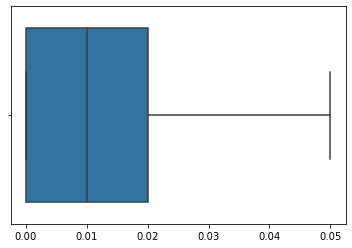

In [25]:
sns.boxplot(lista_pesquisas);